In [1]:
import pandas as pd
import itertools as it
import numpy as np
import networkx as nx
from networkx.algorithms import community as nxcom
import matplotlib.pyplot as plt
import statistics as stat
import powerlaw as pw

In [2]:
path = 'C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/imdb_dreamworks.xlsx'
excel_dreamworks = pd.ExcelFile(path)
sheets_dreamworks = excel_dreamworks.sheet_names[1:]
raw_dreamworks = dict((sheets_dreamworks[i], excel_dreamworks.parse(sheets_dreamworks[i])) for i in range(len(sheets_dreamworks)))

In [3]:
raw_dreamworks

{'Antz':                     crew       dept                         function
 0           Eric Darnell  direction                    (directed by)
 1            Tim Johnson  direction                    (directed by)
 2            Todd Alcott    writers                   (screenplay) &
 3            Chris Weitz    writers                   (screenplay) &
 4             Paul Weitz    writers                     (screenplay)
 ..                   ...        ...                              ...
 152          Adam Valdez  animation                         animator
 153        Conrad Vernon  animation                     story artist
 154      Triva von Klark  animation  animation production supervisor
 155          Simon Wells  animation          additional story artist
 156  Catherine Yuh Rader  animation  story artist (as Catherine Yuh)
 
 [157 rows x 3 columns],
 'PrinceEgypt':                          crew       dept  \
 0              Brenda Chapman  direction   
 1               Ste

In [4]:
year_dreamworks = {'Antz': 1998, 'PrinceEgypt': 1998, 'ElDorado': 2000, 'ChikRun': 2000, 'Shrek': 2001, 'Stallion': 2002,
 'Sinbad': 2003, 'Shrek2': 2004, 'SharkTale': 2004, 'Madagascar': 2005, 'Wallace': 2005, 'OverHedge': 2006,
 'FlushedAway': 2006, 'Shrek3': 2007, 'BeeMovie': 2007, 'KungFuPanda': 2008, 'Madagascar2': 2008, 'Monsters': 2009,
 'TrainDragon': 2010, 'ShrekForever': 2010, 'Megamind': 2010, 'KungFuPanda2': 2011, 'PussBoots': 2011, 'Madagascar3': 2012,
 'Guardians': 2012, 'Croods': 2013, 'Turbo': 2013, 'Peabody': 2014, 'TrainDragon2': 2014, 'Penguins': 2014,
 'Home': 2015, 'KungFuPanda3': 2016, 'Trolls': 2016, 'BossBaby': 2017, 'CapUnderpants': 2017, 'TrainDragon3': 2019}

In [5]:
for film in sheets_dreamworks:
    print("\nfilm:", film)
    raw_dreamworks[film]['film'] = film
    raw_dreamworks[film]['year'] = year_dreamworks[film]
    print(raw_dreamworks[film][0:4])


film: Antz
           crew       dept        function  film  year
0  Eric Darnell  direction   (directed by)  Antz  1998
1   Tim Johnson  direction   (directed by)  Antz  1998
2   Todd Alcott    writers  (screenplay) &  Antz  1998
3   Chris Weitz    writers  (screenplay) &  Antz  1998

film: PrinceEgypt
              crew       dept  function         film  year
0   Brenda Chapman  direction       NaN  PrinceEgypt  1998
1    Steve Hickner  direction       NaN  PrinceEgypt  1998
2      Simon Wells  direction       NaN  PrinceEgypt  1998
3  Philip LaZebnik    writers  (writer)  PrinceEgypt  1998

film: ElDorado
                 crew       dept                   function      film  year
0       Bibo Bergeron  direction  (as Eric 'Bibo' Bergeron)  ElDorado  2000
1            Don Paul  direction                        NaN  ElDorado  2000
2  Jeffrey Katzenberg  direction               (uncredited)  ElDorado  2000
3        Terry Rossio    writers             (screenplay) &  ElDorado  2000

fi

            crew       dept        function    film  year
0   Kirk DeMicco  direction             NaN  Croods  2013
1  Chris Sanders  direction             NaN  Croods  2013
2  Chris Sanders    writers  (screenplay) &  Croods  2013
3   Kirk DeMicco    writers    (screenplay)  Croods  2013

film: Turbo
            crew       dept         function   film  year
0    David Soren  direction              NaN  Turbo  2013
1   Darren Lemke    writers  (screenplay by)  Turbo  2013
2  Robert Siegel    writers  (screenplay by)  Turbo  2013
3    David Soren    writers  (screenplay by)  Turbo  2013

film: Peabody
                crew       dept                           function     film  \
0        Rob Minkoff  direction                                NaN  Peabody   
1           Jay Ward    writers  (based on the series produced by)  Peabody   
2       Craig Wright    writers                       (screenplay)  Peabody   
3  Robert Ben Garant    writers            (additional dialogue) &  Peabody 

In [6]:
#Concatenate the films into one flat file
data_dreamworks = pd.concat(raw_dreamworks).replace({'dept': {'director': 'direction', 'co-director': 'direction'}})
data_dreamworks['studio'] = 'DreamWorks'
print(data_dreamworks)

                                 crew       dept              function  \
Antz         0           Eric Darnell  direction         (directed by)   
             1            Tim Johnson  direction         (directed by)   
             2            Todd Alcott    writers        (screenplay) &   
             3            Chris Weitz    writers        (screenplay) &   
             4             Paul Weitz    writers          (screenplay)   
...                               ...        ...                   ...   
TrainDragon3 223          Onur Yeldan  animation              animator   
             224        Nelson Yokota  animation          story artist   
             225  Catherine Yuh Rader  animation          story artist   
             226        Gil Zimmerman  animation        head of layout   
             227    Catherin Cubillan  animation  Modeler (uncredited)   

                          film  year      studio  
Antz         0            Antz  1998  DreamWorks  
         

In [7]:
data_dreamworks.columns

Index(['crew', 'dept', 'function', 'film', 'year', 'studio'], dtype='object')

#### Ensuring the values of each variable is unique for each film data

In [8]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [9]:
def verify_unique(df, var):
    df['ones'] = 1
    unique = df.groupby(var)['ones'].sum()
    print("Verify: {}. Total entries: {}. Unique entries: {}".format(var, len(df.index), len(unique)))
    print_full(df.groupby(var)['ones'].sum())

In [10]:
verify_unique(data_dreamworks, 'crew')

Verify: crew. Total entries: 14384. Unique entries: 4338
crew
'Slick' Jim Connolly                1
A.J. Weber                          1
Aaron C. Adams                      1
Aaron Chiesa                        1
Aaron Cimity                        1
Aaron Conover                       3
Aaron Dem                           1
Aaron Estrada                       6
Aaron Florez                        7
Aaron Holly                         1
Aaron James McComas                 8
Aaron Kirby                         7
Aaron Pfau                          3
Aaron Smith                        10
Aaron Stewart                       1
Aaron Weldon                        6
Aaron Williams                      3
Aayush Sharma                       3
Abhijit Khanvilkar                  3
Abhijit Nandy                       1
Abhik Pramanik                      4
Abhishek Pandey                     2
Abraham Barrera                     2
Abraham Meneu Oset                  4
Adam Burke                

In [11]:
len(data_dreamworks.index)

14384

In [12]:
see = data_dreamworks
see['ones'] = 1
unique = see.groupby('crew')['ones'].sum()
print(len(list(see.groupby('crew')['ones'])))
print(unique)



4338
crew
'Slick' Jim Connolly     1
A.J. Weber               1
Aaron C. Adams           1
Aaron Chiesa             1
Aaron Cimity             1
                        ..
Zhiyang Rong             1
Zhongwei Jin             1
Zoe Izzard               1
Zsoka Barkacs           12
Zubin Wadia              5
Name: ones, Length: 4338, dtype: int64


#### Create fully connected graph among the nodes for each film

##### Model 1
In this model we shall consider only the directors, story writers, screenplay and producers. And we presume that they are knitted together.

In [13]:
#Check the unique values of dept
print(data_dreamworks['dept'].unique())

#Clean up the values and store the extracted in data_dreamworks1
data_dreamworks1 = data_dreamworks.replace({'dept': {'director': 'direction', 'co-director': 'direction'}})
print("unique values dept", data_dreamworks1['dept'].unique())

#Extract values
data_dreamworks1.loc['dept'] = 'direction'


#Drop duplicates. Each node should be unique
#data_dreamworks1 = data_dreamworks1.drop_duplicates(['a','b'])

['direction' 'writers' 'producer' 'art direction' 'art' 'visual effects'
 'animation']
unique values dept ['direction' 'writers' 'producer' 'art direction' 'art' 'visual effects'
 'animation']


#### Create a data set for network graph
1. Limit data_pixar by crew
2. drop duplictaes in each film
3. combination of edges
4. append to model1

In [14]:
#Store the nodes for Model1
scope = ['direction', 'producer', 'writers', 'screenplay']
data1 = data_dreamworks.loc[data_dreamworks['dept'].isin(scope)]
nodes_dreamworks = pd.DataFrame()
for film in sheets_dreamworks:
    crew = data1.loc[data1['film']==film].drop_duplicates('crew')
    nodes = crew['crew']
    nodes_dreamworks = pd.concat([nodes_dreamworks, nodes])
nodes_dreamworks = nodes_dreamworks.drop_duplicates()
nodes_dreamworks['studio'] = 'dreamworks'
print(nodes_dreamworks)

#Save the data set
nodes_dreamworks.to_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/nodes_dreamworks.csv')

                                    0      studio
(Antz, 0)                Eric Darnell  dreamworks
(Antz, 1)                 Tim Johnson  dreamworks
(Antz, 2)                 Todd Alcott  dreamworks
(Antz, 3)                 Chris Weitz  dreamworks
(Antz, 4)                  Paul Weitz  dreamworks
...                               ...         ...
(CapUnderpants, 1)   Nicholas Stoller  dreamworks
(CapUnderpants, 2)         Dav Pilkey  dreamworks
(CapUnderpants, 4)      Marie Balland  dreamworks
(CapUnderpants, 5)     Chris Finnegan  dreamworks
(CapUnderpants, 7)  Daniela Mazzucato  dreamworks

[223 rows x 2 columns]


In [14]:
#Model1
#scope = ['direction', 'writers', 'screenplay', 'producer', 'art direction']
scope = ['direction', 'producer', 'screenplay', 'writers']
#scope = ['animation']
data1 = data_dreamworks.loc[data_dreamworks['dept'].isin(scope)]
model1 = pd.DataFrame()
for film in sheets_dreamworks:
    crew = data1.loc[data1['film']==film].drop_duplicates('crew')
    nodes = crew['crew']
    edges = pd.DataFrame(it.combinations(nodes, 2)).rename(columns = {0: 'source', 1: 'target'})
    edges['film'] = film
    edges['year'] = year_dreamworks[film]
    edges['studio'] = 'DreamWorks'
    print("\nFilm:", film)
    print("Data:", edges[0:3])
    model1 = pd.concat([model1, edges])

print("\nModel 1:", model1)
        


Film: Antz
Data:          source       target  film  year      studio
0  Eric Darnell  Tim Johnson  Antz  1998  DreamWorks
1  Eric Darnell  Todd Alcott  Antz  1998  DreamWorks
2  Eric Darnell  Chris Weitz  Antz  1998  DreamWorks

Film: PrinceEgypt
Data:            source           target         film  year      studio
0  Brenda Chapman    Steve Hickner  PrinceEgypt  1998  DreamWorks
1  Brenda Chapman      Simon Wells  PrinceEgypt  1998  DreamWorks
2  Brenda Chapman  Philip LaZebnik  PrinceEgypt  1998  DreamWorks

Film: ElDorado
Data:           source              target      film  year      studio
0  Bibo Bergeron            Don Paul  ElDorado  2000  DreamWorks
1  Bibo Bergeron  Jeffrey Katzenberg  ElDorado  2000  DreamWorks
2  Bibo Bergeron        Terry Rossio  ElDorado  2000  DreamWorks

Film: ChikRun
Data:        source             target     film  year      studio
0  Peter Lord          Nick Park  ChikRun  2000  DreamWorks
1  Peter Lord  Karey Kirkpatrick  ChikRun  2000  DreamWork

2  Tim Johnson      Adam Rex  Home  2015  DreamWorks

Film: KungFuPanda3
Data:                source               target          film  year      studio
0  Alessandro Carloni  Jennifer Yuh Nelson  KungFuPanda3  2016  DreamWorks
1  Alessandro Carloni       Jonathan Aibel  KungFuPanda3  2016  DreamWorks
2  Alessandro Carloni         Glenn Berger  KungFuPanda3  2016  DreamWorks

Film: Trolls
Data:           source          target    film  year      studio
0  Mike Mitchell      Walt Dohrn  Trolls  2016  DreamWorks
1  Mike Mitchell  Jonathan Aibel  Trolls  2016  DreamWorks
2  Mike Mitchell    Glenn Berger  Trolls  2016  DreamWorks

Film: BossBaby
Data:         source             target      film  year      studio
0  Tom McGrath  Michael McCullers  BossBaby  2017  DreamWorks
1  Tom McGrath       Marla Frazee  BossBaby  2017  DreamWorks
2  Tom McGrath    Rebecca Huntley  BossBaby  2017  DreamWorks

Film: CapUnderpants
Data:         source            target           film  year      studio
0 

In [15]:
#Save the data set
model1.to_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_dreamworks.csv')

print("Model1 length:", len(model1))

Model1 length: 2362


#### Drawing the Network

In [16]:
G = nx.from_pandas_edgelist(model1, source = 'source', target = 'target', create_using=nx.Graph())

In [17]:
print("Nodes: {}. Edges: {}".format(len(G.nodes), len(G.edges)))

Nodes: 223. Edges: 2013


C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


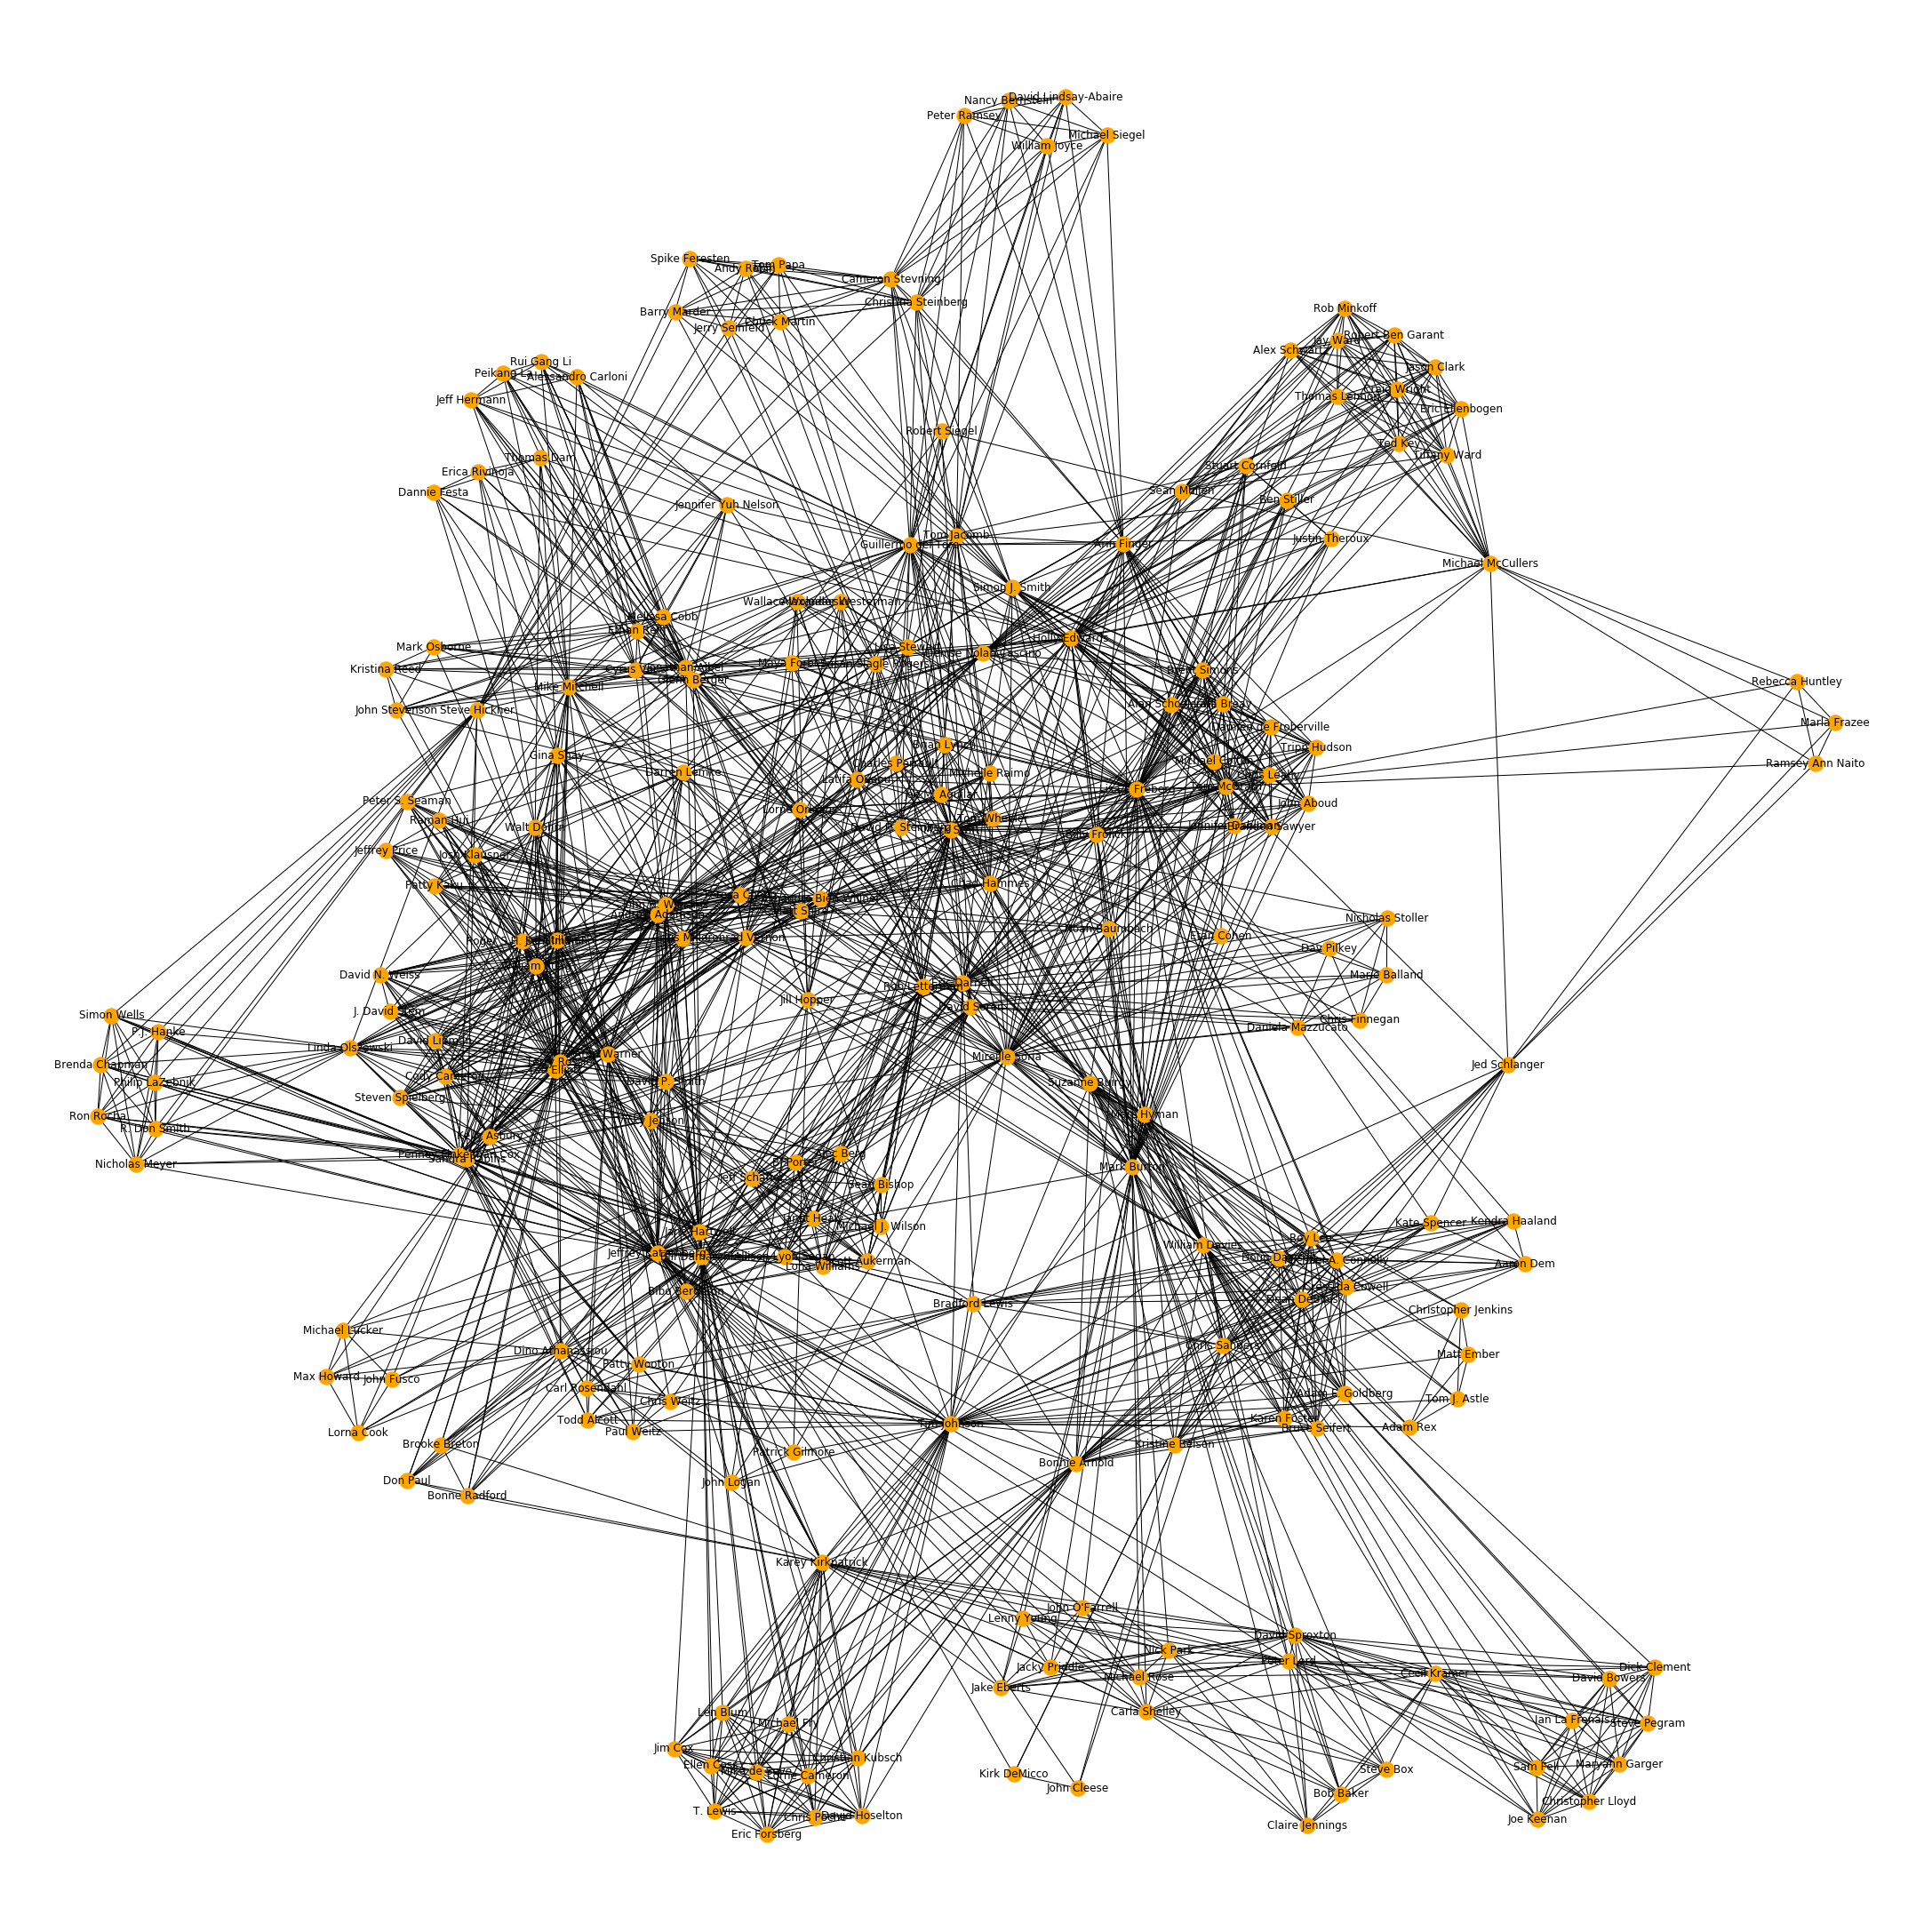

In [18]:
#Graph 1
plt.figure(figsize = (30, 30))
nx.draw_spring(G, with_labels=True, node_color='orange')
# nx.draw_networkx(
#     G, pos='spring', node_size=0, with_labels=True, alpha = 0.7, font_size = 15)

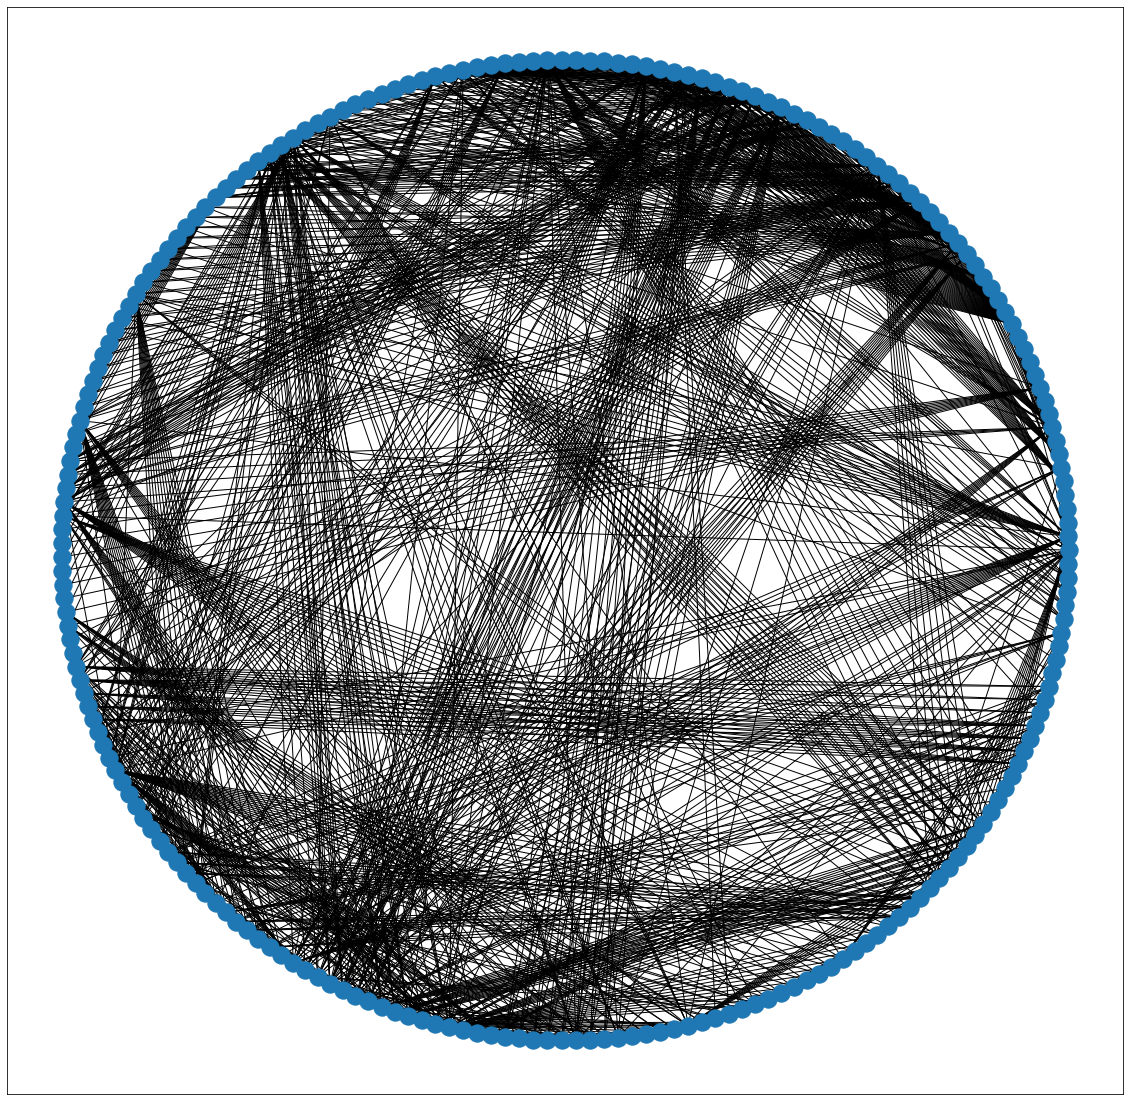

In [19]:
#Graph 2
plt.figure(figsize = (20, 20))
nx.draw_networkx(G, pos = nx.circular_layout(G), with_labels=False)

The links almost resembles a random network. We expect that in this network where almost all the nodes have collaborated with each other, the network is almost random.

#### Degree distribution: Is this network scale-free?

In [20]:
#Take the degrees
degrees = [G.degree(node) for node in G]
degrees.sort(reverse=True)
kmin = min(degrees)
kmax = max(degrees)
print("Degree sequence", degrees)
print("Degree min", kmin)
print("Degree max", kmax)
print("Degree mean", stat.mean(degrees))
print("Degree sd", stat.stdev(degrees))

Degree sequence [69, 60, 57, 51, 50, 47, 46, 46, 46, 45, 43, 43, 42, 42, 42, 38, 38, 38, 38, 35, 35, 35, 34, 34, 34, 33, 33, 33, 33, 33, 32, 32, 31, 28, 27, 27, 27, 27, 27, 27, 26, 26, 26, 25, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 22, 21, 21, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4]
Degree min 4
Degree max 69
Degree mean 18.053811659192824
Degree sd 11.363239739959347


In [21]:
#We shall use the powerlaw package developed by Alstott, et al.
fit = pw.Fit(degrees)

Calculating best minimal value for power law fit
C:\Users\Lenovo\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0.5, 1.0, 'Degree distribution (dotted) and Theoretical PDF (line)')

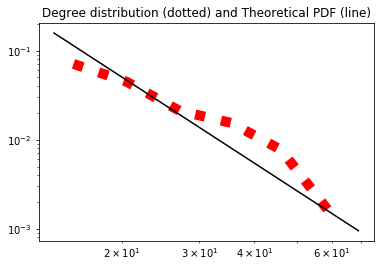

In [22]:
#Plot of the strength distribution in Log-log scale and the theoretical pdf
fig1 = fit.plot_pdf(color='r', linewidth = 10, linestyle= ":")
fit.power_law.plot_pdf(color='black', linestyle="-", ax=fig1)
plt.title('Degree distribution (dotted) and Theoretical PDF (line)')

In [23]:
#MLE Estimate of alpha, [Clauset, et al. 2009]
print("MLE for alpha:", fit.power_law.alpha)

MLE for alpha: 3.201820193782602


#### Size of the network

In [24]:
#Diameter: longest path
print("Diameter:", nx.diameter(G))

#Average path
print("Average shortest path", nx.average_shortest_path_length(G))

Diameter: 4
Average shortest path 2.424110208863572


In [25]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum([list(length_target.values())
        for length_target in length_source_target.values()], [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.tight_layout()

([<matplotlib.axis.XTick at 0x1e092516c88>,
 <a list of 5 Text xticklabel objects>)

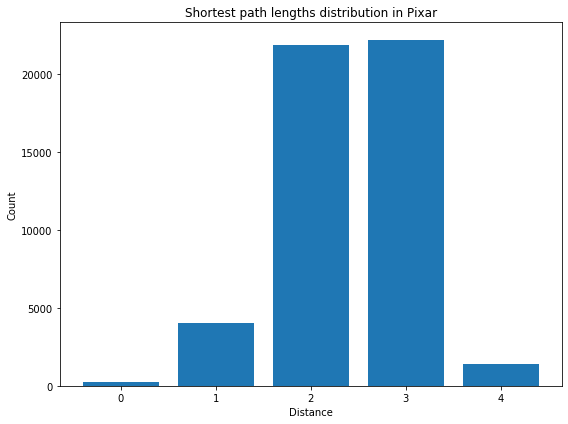

In [26]:
path_length_histogram(G, title="Shortest path lengths distribution in Pixar")
plt.xticks([0, 1, 2, 3, 4])

#### Measures of Centrality

In [27]:
#Global clustering
print("Transitivity:", nx.transitivity(G))
print("Average clustering:", nx.average_clustering(G))

Transitivity: 0.5410381817434549
Average clustering: 0.8212030324598718


#### The Central Airports: The hubs, the most in-between, and the closest

In [28]:
#Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
print("The top 10 hubs:")
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

The top 10 hubs:


[('Jeffrey Katzenberg', 0.20126273734982936),
 ('Conrad Vernon', 0.1965920742290589),
 ('Andrew Adamson', 0.19085399898569022),
 ('John H. Williams', 0.19085399898569022),
 ('Aron Warner', 0.1822484671807512),
 ('Terry Rossio', 0.1819877004294586),
 ('Ted Elliott', 0.1819877004294586),
 ('William Steig', 0.16871065862248338),
 ('Joe Stillman', 0.16871065862248338),
 ('Roger S.H. Schulman', 0.16871065862248338)]

In [29]:
#Local Clustering Coefficient of the top-10 Hubs
clustering = nx.clustering(G)
print("The local clustering coeff of the top 10 hubs:")
[(x, clustering[x]) for x in sorted(G, key=lambda x:eigenvector[x], reverse=True)[0:10]]

The local clustering coeff of the top 10 hubs:


[('Jeffrey Katzenberg', 0.22847399829497017),
 ('Conrad Vernon', 0.38743961352657),
 ('Andrew Adamson', 0.41835748792270533),
 ('John H. Williams', 0.41835748792270533),
 ('Aron Warner', 0.4418604651162791),
 ('Terry Rossio', 0.4529616724738676),
 ('Ted Elliott', 0.4529616724738676),
 ('William Steig', 0.5882352941176471),
 ('Joe Stillman', 0.5882352941176471),
 ('Roger S.H. Schulman', 0.5882352941176471)]

In [30]:
#Betweenness Centrality
betweenness = nx.betweenness_centrality(G, normalized=False)
print("The top 10 hubs and their betweenness")
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[0:10]

The top 10 hubs and their betweenness


[('Jeffrey Katzenberg', 2866.351889855024),
 ('Lisa J. Freberg', 2407.2206609271407),
 ('Mark Swift', 2134.7996088558584),
 ('William Davies', 1692.983504512729),
 ('Mireille Soria', 1627.8214863768853),
 ('Mark Burton', 1566.884931842837),
 ('Tim Johnson', 1527.623899440971),
 ('Bill Damaschke', 1476.2116211848477),
 ('Guillermo del Toro', 1259.6444180699955),
 ('Holly Edwards', 1181.7619356610091)]

In [31]:
#Closeness Centrality
closeness = nx.closeness_centrality(G)
print("The top 10 hubs and their closeness")
#[(x, closeness[x]) for x in sorted(G1, key=lambda x:eigenvector[x], reverse=True)[0:10]]
sorted(closeness.items(), key=lambda x: x[1], reverse=True)[0:10]

The top 10 hubs and their closeness


[('Lisa J. Freberg', 0.5522388059701493),
 ('Mark Swift', 0.5495049504950495),
 ('Jeffrey Katzenberg', 0.5467980295566502),
 ('Mireille Soria', 0.5414634146341464),
 ('Mark Burton', 0.5401459854014599),
 ('Conrad Vernon', 0.5260663507109005),
 ('Eric Darnell', 0.5235849056603774),
 ('Holly Edwards', 0.5223529411764706),
 ('Tom McGrath', 0.5068493150684932),
 ('Tim Johnson', 0.5056947608200456)]

#### Community structure

In [32]:
#Greedy algo
# Find the communities
print("Community Detection: Clauset-Newman-Moore Greedy Algorithm")
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Count the communities
print("Number of communities:", len(communities))
for i in range(len(communities)):
    print("")
    print("Community {}: {}".format(i+1, list(communities[i])))

Community Detection: Clauset-Newman-Moore Greedy Algorithm
Number of communities: 7

Community 1: ['Philip LaZebnik', 'Patty Kaku', 'Penney Finkelman Cox', 'Simon Wells', 'John Fusco', 'Max Howard', 'Raman Hui', 'Carl Rosendahl', 'Patty Wooton', 'P.J. Hanke', 'Josh Klausner', 'David Lipman', 'David P. Smith', 'Ted Elliott', 'R. Don Smith', 'Chris Miller', 'David N. Weiss', 'Jeffrey Katzenberg', 'Ron Rocha', 'John H. Williams', 'Terry Rossio', 'Joe Stillman', 'Kelly Asbury', 'Peter S. Seaman', 'Vicky Jenson', 'Steve Hickner', 'Andrew Adamson', 'Roger S.H. Schulman', 'Nicholas Meyer', 'Linda Olszewski', 'Michael Lucker', 'Erica Rivinoja', 'Darren Lemke', 'Aron Warner', 'Paul Weitz', 'Lorna Cook', 'Mike Mitchell', 'Jeffrey Price', 'Steven Spielberg', 'Chris Weitz', 'Gina Shay', 'William Steig', 'Todd Alcott', 'Cody Cameron', 'Dannie Festa', 'Thomas Dam', 'Walt Dohrn', 'J. David Stem', 'Brenda Chapman', 'Sandra Rabins']

Community 2: ['Denise Nolan Cascino', 'Billy Frolick', 'Robert Ben Ga

In [33]:
#Visualization
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [34]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [
    get_color(G.nodes[v]['community'])
    for v in G.nodes]

# Set community color for internal edges
external = [
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community'] == 0]
internal = [
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community'] > 0]
internal_color = [
    get_color(G.edges[e]['community'])
    for e in internal]

C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


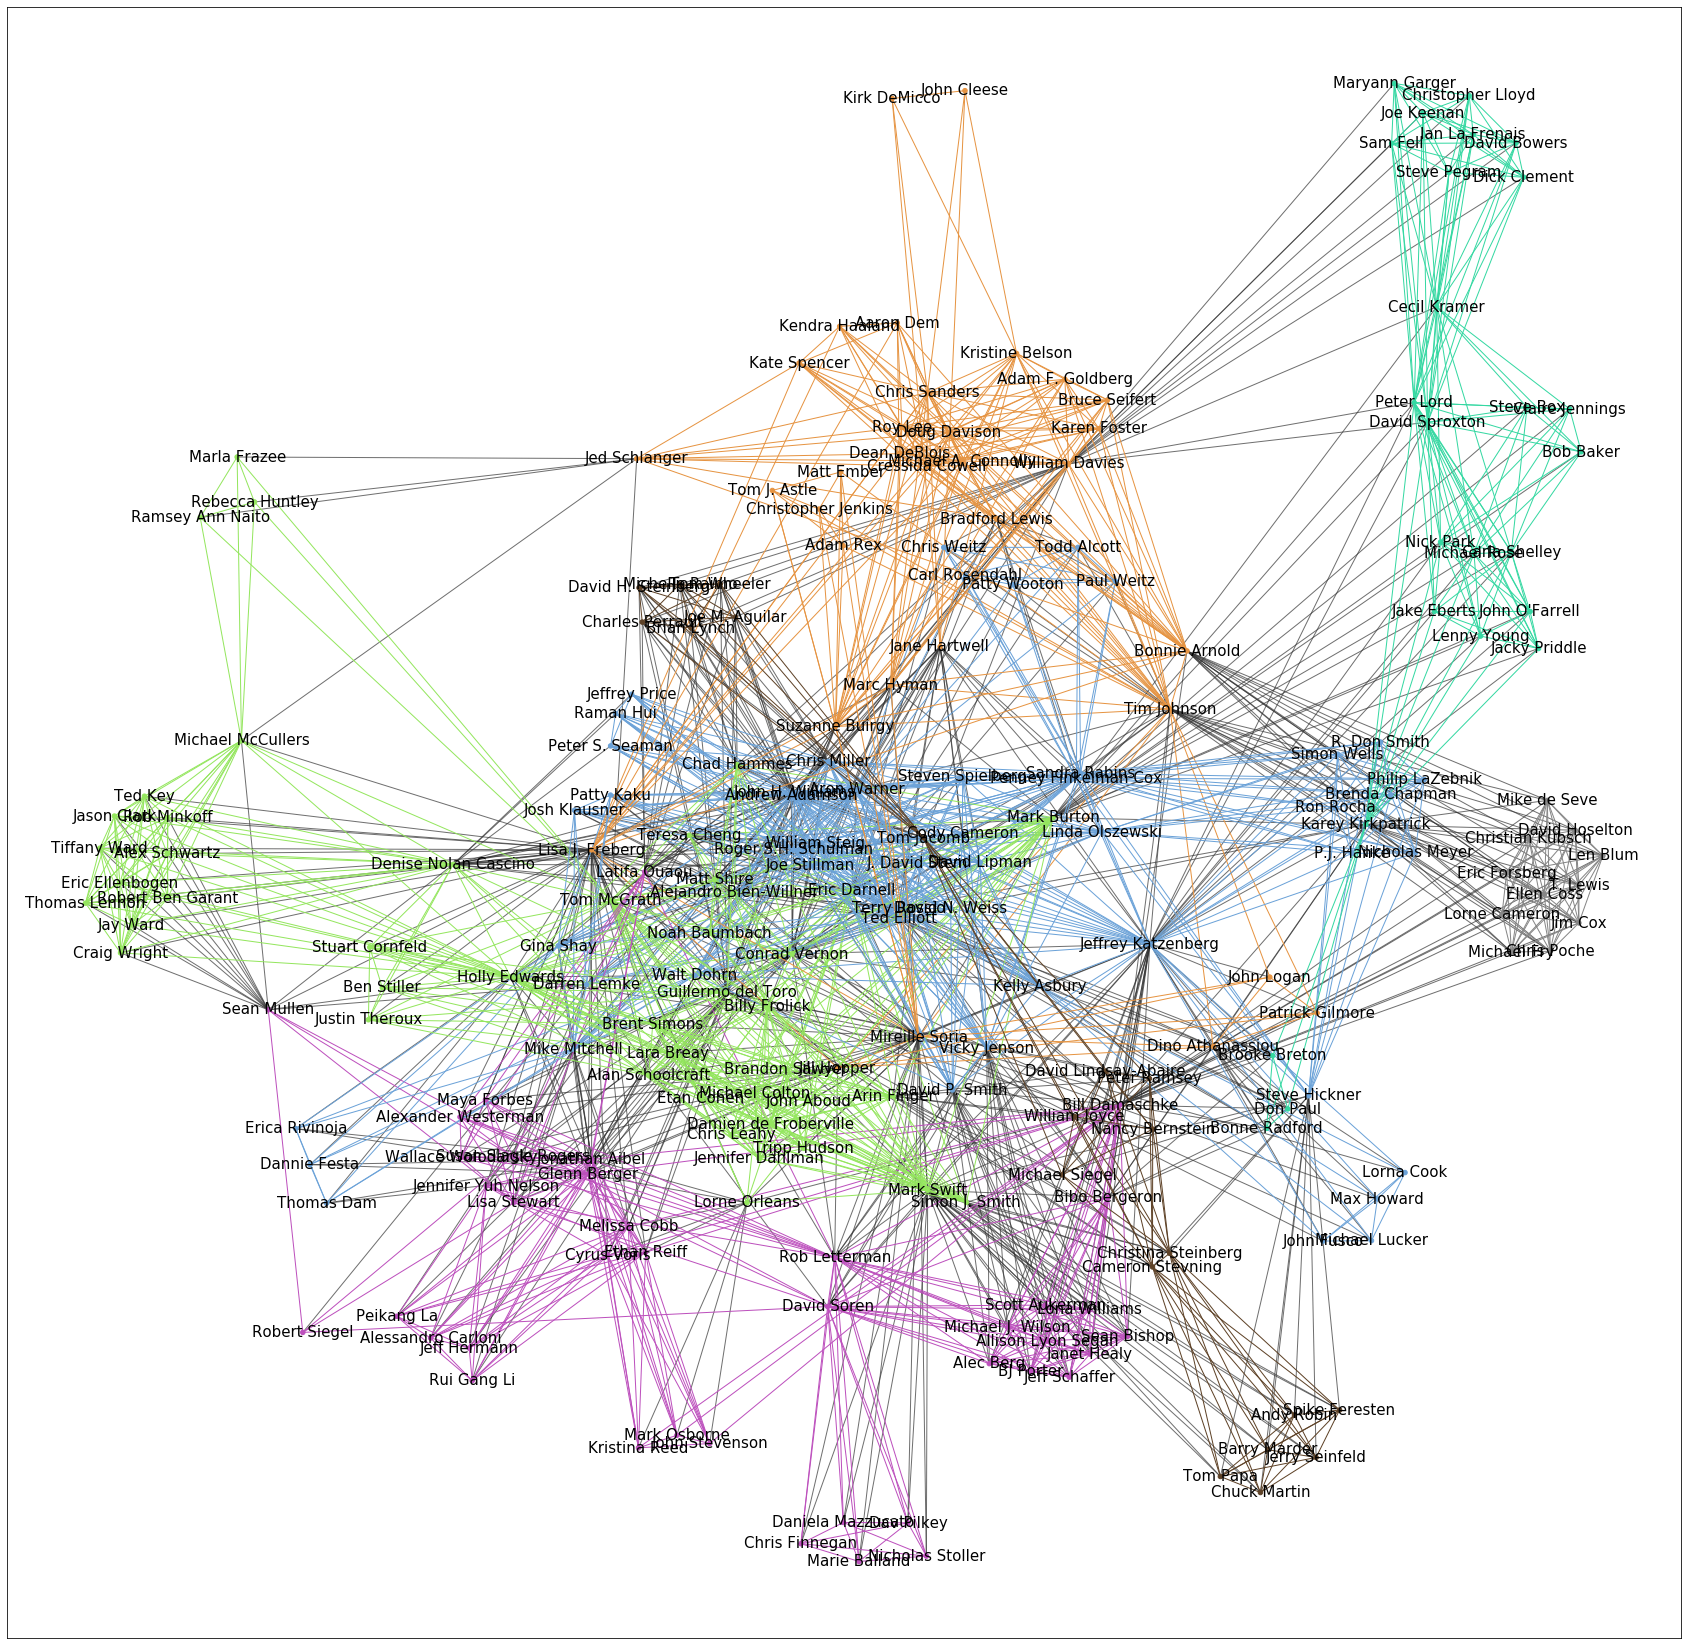

In [35]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
# Draw external edges
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False, alpha = 0.7, font_size = 15)
# Draw nodes and internal edges
nx.draw_networkx(
    G, pos=pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color, node_size=20, 
    with_labels=True, font_size = 15)
#plt.title("Communities of Directors, Writers, Screenplay and Producers in Pixar")